In [5]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

In [8]:
ar_params = np.array([0.75,-0.25])
ma_params = np.array([0.65,0.35])
ar=np.r_[1,-ar_params]
ma=np.r_[1,ma_params]

In [10]:
np.random.seed(42)
arma_process = ArmaProcess(ar,ma)
synthetic_data = arma_process.generate_sample(nsample=500)

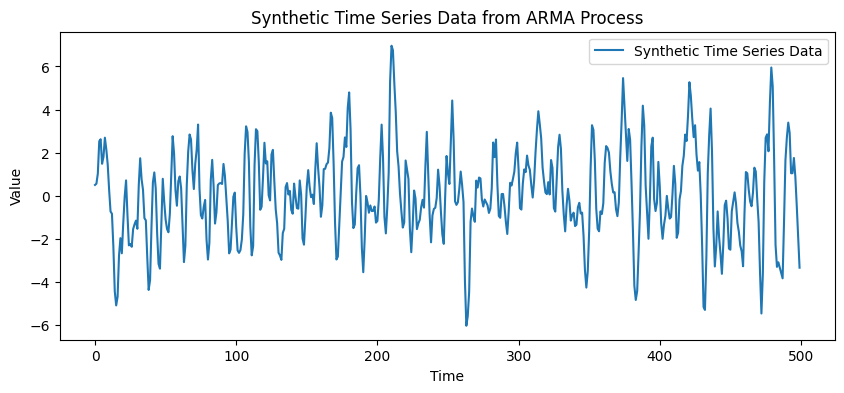

In [12]:
plt.figure(figsize=(10,4))
plt.plot(synthetic_data,label="Synthetic Time Series Data")
plt.title("Synthetic Time Series Data from ARMA Process")
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.show()   

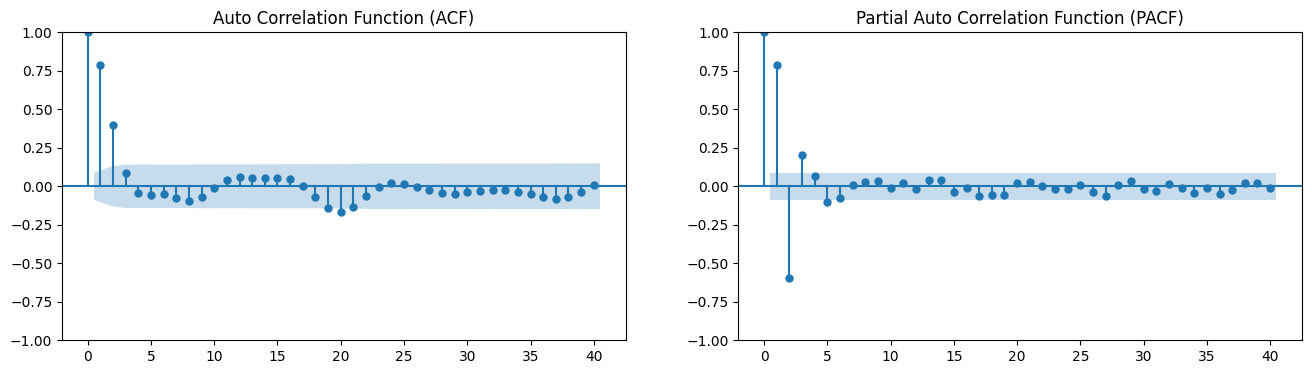

In [14]:
fig,axes=plt.subplots(1,2,figsize=(16,4))
plot_acf(synthetic_data,lags=40,ax=axes[0])
axes[0].set_title("Auto Correlation Function (ACF)")
plot_pacf(synthetic_data,lags=40,ax=axes[1])
axes[1].set_title("Partial Auto Correlation Function (PACF)")
plt.show()

In [15]:
adf_test = adfuller(synthetic_data)
print("ADF Statistic:",adf_test[0],"\n")
print("P-value:",adf_test[1],"\n")
for key,value in adf_test[4].items():
    print(f"Critical Value({key}):{value}")
if(adf_test[1]<0.05):
    print("The time series is stationary.Reject H0")
else:
    print("THe time series is non-stationary.Fail to Reject H0")


ADF Statistic: -8.657678181744625 

P-value: 4.918301373277314e-14 

Critical Value(1%):-3.4436298692815304
Critical Value(5%):-2.867396599893435
Critical Value(10%):-2.5698893429241916
The time series is stationary.Reject H0
